Basado en el análisis de datos de Prasad Patil [en medium](https://medium.com/@theprasadpatil/exploratory-data-analysis-8fc1cb20fd15).

# Análisis exploratorio de los datos

**Profesora:** Ivania Donoso.

El siguiente _jupyter notebook_ tiene como fín ser una guía de cómo utilizar  [`pandas`](https://pandas.pydata.org/) y [`seaborn`](https://seaborn.pydata.org/examples/index.html) para realizar un análisis de datos exploratorio. Este notebook no es un análisis completo del dataset presentado, solo muestra ejemplos de lo que se debería realizar en cada uno de los pasos que se vieron en clases.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Para que en el notebook se muestren los gráficos sin tener que escribir más código
%matplotlib inline  

# 1. Importar el dataset

Vamos a usar el data set *Wine Quality Data Set* disponible y explicado [aquí](https://archive.ics.uci.edu/ml/datasets/wine+quality). Solo vamos a hacer el análisis con el set de datos sobre el vino blanco. Lo descargamos y utilizamos.

In [ ]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2018-09-29 10:30:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
ERROR: cannot verify archive.ics.uci.edu's certificate, issued by 'CN=InCommon RSA Server CA,OU=InCommon,O=Internet2,L=Ann Arbor,ST=MI,C=US':
  Self-signed certificate encountered.
To connect to archive.ics.uci.edu insecurely, use `--no-check-certificate'.


Los datos originales están separados por `;`

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn1.csv')

# 2. Get a feel of the data

In [ ]:
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7031,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [ ]:
df.shape

(7032, 21)

El dataset tiene 4898 observaciones y 12 caracterísiticas. La variablee `quality` es la variable dependiente y las otas son caracterísiticas físico-químicas. 

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


**Key Insight**

- El promedio es menor que la mediana (representada por la fila `50%`) para varias columnas.
- Hay una gran diferencia entre el tercer quartil (fila `75%`) y el máximo para las columnas `residual sugar`, `free sulfur dioxide`, `total sulfur dioxide`
- Todo esto sugiere que hay columnas con outliers. Estos tendrán que ser eliminados para realizar análisis.

# 3. Reconocer dificultades del dataset

## Datos faltantes

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

El set de datos no tiene datos faltantes y solo tenemos variable del tipo `float` e `integer`. También lo podemos ver con una visualización.

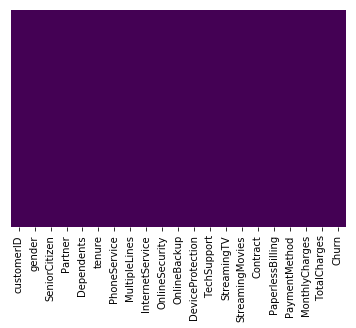

In [ ]:
sns.heatmap(df.isna(), cbar=False, yticklabels=False, cmap='viridis')

Cada cuadrado que no tiene morado es un dato faltante. En este caso no hay datos faltantes, así que todo se verá morado.

## Detectar outliers
Usando boxplots podemos ver rápidamente los outliers.

In [ ]:
import numpy as np
number_of_columns = len(df.columns.dtype.isin([np.float64,np.int64]))
columna = df.columns.dtype.isin([np.float64,np.int64])
fig, ax = plt.subplots(1, number_of_columns, figsize=(number_of_columns*2, 10))
for i, column in enumerate(columna):
    sns.set_style('whitegrid')
    sns.boxplot(columna, orient='v', ax=ax[i])
plt.tight_layout()

AttributeError: 'numpy.dtype' object has no attribute 'isin'

**Key Insights**

Como ya habíamos visto, claramente hay varias variables que tienen outliers. Estos tendrán que ser identificados y eliminados antes de crear modelos.

### Distribuciones
Usando violinplots podemos ver las verdaderas distribuciones de los datos.

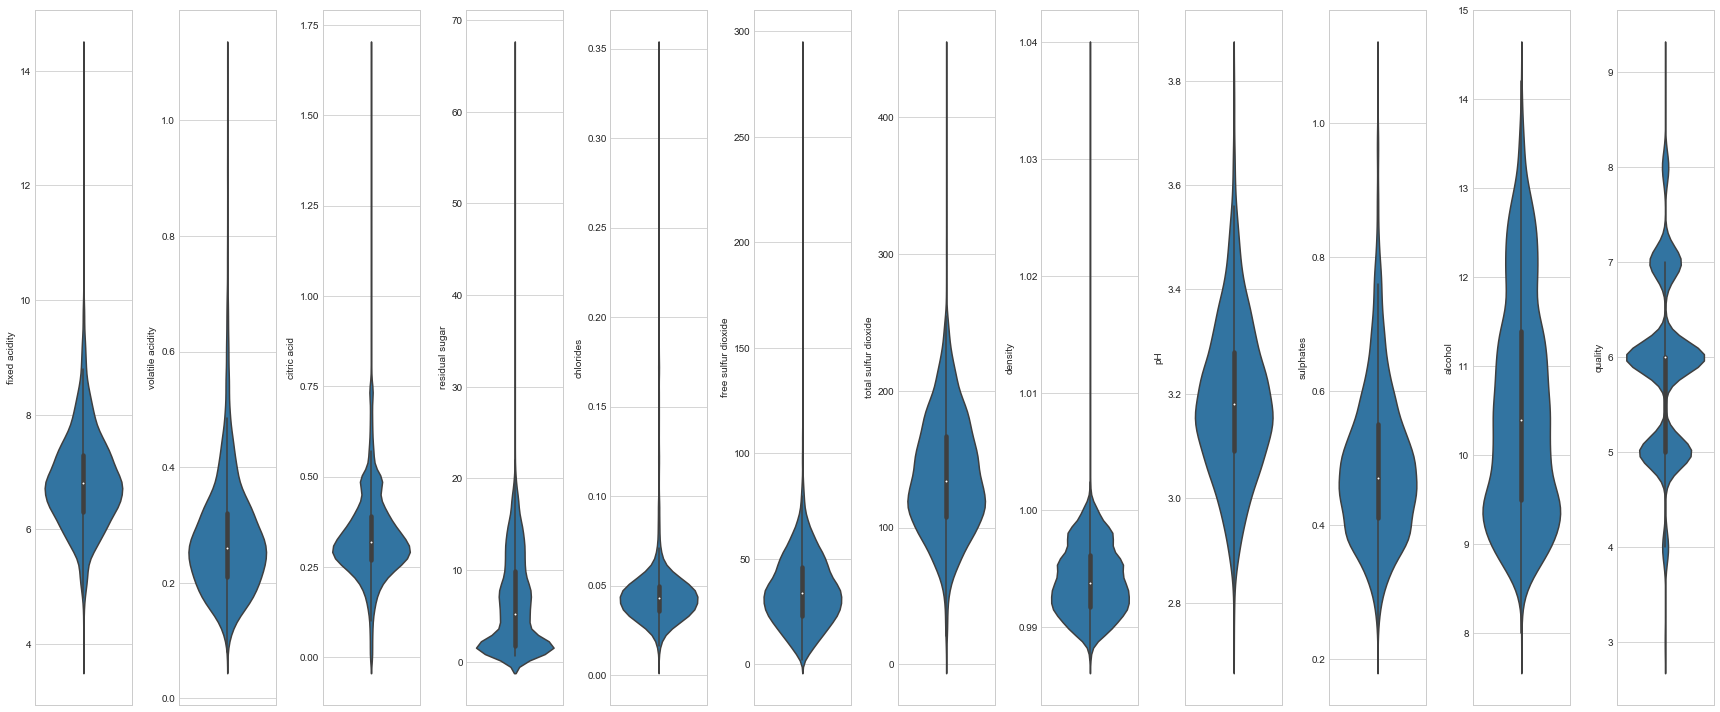

In [ ]:
number_of_columns = len(df.columns)
fig, ax = plt.subplots(1, number_of_columns, figsize=(number_of_columns*2, 10))
for i, column in enumerate(df.columns):
    sns.set_style('whitegrid')
    sns.violinplot(df[column], orient='v', ax=ax[i])
plt.tight_layout()

Este tipo de gráficos nos puede ayudar a entender mejor cómo son los datos.

**Key Insights**

En el caso de `quality`, se ven claramente 3 peaks de de valores que en el boxplot no podíamos ver. En el caso de `residual sugar` vemos que el valor más frecuente no es el valor de la media, algo que tampoco podíamos ver con el boxplot o la tabla.

# 4. Ver más en profundidad el dataset

## Entender la variable dependiente

In [ ]:
df.quality.unique() 

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

- La variable quality es discreta y categórica/ordenada.
- `quality` es un puntaje de 1 a 10, donde 1 es la peor calidad y 10 es la mejor calidad
- Los rankings 1, 2 y 10 no son usados en este dataset.

In [ ]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

Para obtener la cantidad de cada uno de los puntajes podemos usar la función `value_counts` que nos entrega de mayor a menor cantidad, la cantidad de veces que se usa un valor. 

**Key Insights**

Con esto podemos ver que los puntajes se concentran en 5, 6 y 7. Hay muy pocos 9 y 3 en el dataset.

## Análisis Bi y Multivariado
Veamos la correlación entre las distintas variables. 

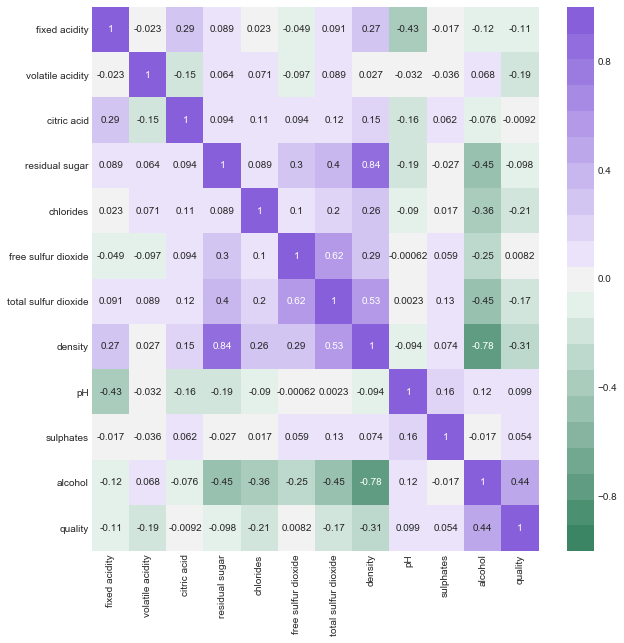

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap=sns.diverging_palette(150, 275, n=21), annot=True, vmin=-1, vmax=1) 

- Morado significa correlación positiva y verde correlación negativa. Si el color es más intenso, más marcada es la correlación
- `annot=True` nos permite ver el valor de la correlación. 

**Key Insights**
- Podemos inferir que `density` tiene una correlación positiva con `residual sugar` y una fuerte correlación negativa con `alcohol`. Esto tiene sentido físico-químico: el azúcar y el agua se transforma en alcohol y dióxido de carbono. El alcohol es menos denso que el agua y el azúcar aumenta la densidad. Más info [aquí](https://en.wikipedia.org/wiki/Ethanol_fermentation)
- `free sulphur dioxide` y `citric acid` casi no tienen correlación con la calidad `quality`


## Cómo es la distribución de las variables?

Ya vimos algo de esto con los violin plots, pero estos gráficos son más conocidos y los pueden ayudar mejor a entender.

C:\Users\U1308420\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\U1308420\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\U1308420\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\U1308420\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'norm

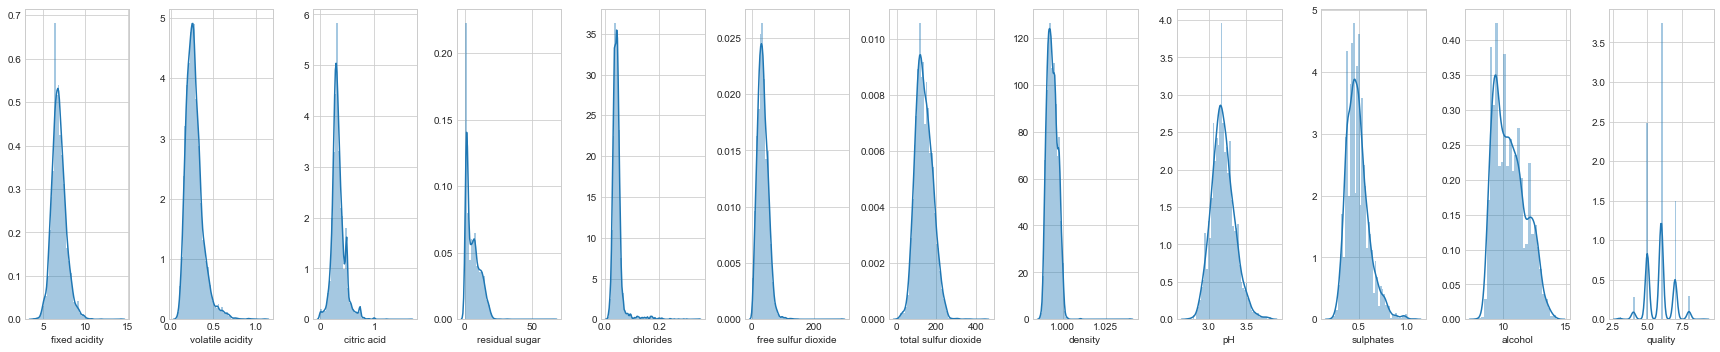

In [ ]:
fig, ax = plt.subplots(1, number_of_columns, figsize=(number_of_columns * 2, 5))
for i, column in enumerate(df.columns):
    sns.set_style('whitegrid')
    sns.distplot(df[column], ax=ax[i])
plt.tight_layout()

**Key insights**
- La columna `pH` tiene una distribución normal.
- Todas las otras variables están distruidas asimétricas positivas o negativas.

# 5. Identificar variables interesantes

En este caso son pocas columnas así que podemos hacer gráficos como el siguiente para poder ver pares de variables que pueden ser interesantes.

In [ ]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)

C:\Users\U1308420\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\U1308420\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\U1308420\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\U1308420\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\U1308420\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\U1308420\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarn

KeyboardInterrupt: 

**¿Qué pasa si eliminamos los outliers?**
Vamos a volver a correr este mismo set de gráficos pero eliminando el valor outlier.

Creamos una copia del dataset actual

In [ ]:
df_sin_outliers = df.copy()

Vamos a eliminar los outliers de algunas columnas solamente. El código de abajo elimina las filas donde la columna tiene el valor máximo.

In [ ]:
for c in ('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density'):
    df_sin_outliers = df_sin_outliers[df_sin_outliers[c] != df_sin_outliers[c].max()]

Para verificar que estamos eliminando todos los outliers vamos a verificar usando los boxplots.

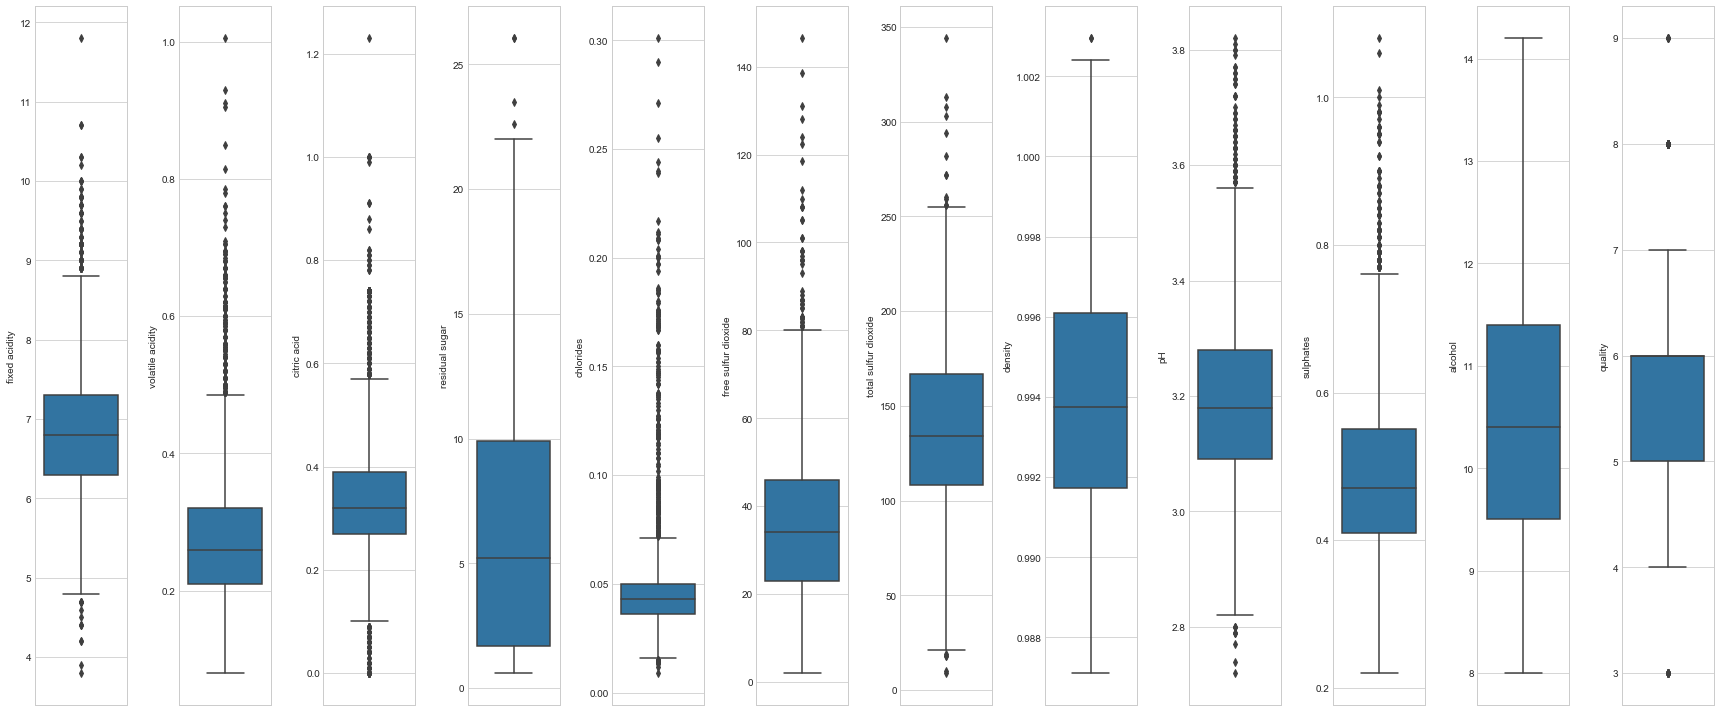

In [ ]:
number_of_columns = len(df.columns)
fig, ax = plt.subplots(1, number_of_columns, figsize=(number_of_columns*2, 10))
for i, column in enumerate(df.columns):
    sns.set_style('whitegrid')
    sns.boxplot(df_sin_outliers[column], orient='v', ax=ax[i])
plt.tight_layout()

Corremos esto hasta que quedemos satisfechos con los outliers que eliminamos

In [ ]:
df_sin_outliers.shape

(4889, 12)

Vemos cuántas filas nos quedan después del proceso y corremos los gráficos de nuevo.

In [ ]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)

# 6. Descubrir patrones en los datos

Vamos a ver más en detalle la relación de `residual sugar`, `alcohol` y `density`. 

In [ ]:
sns.scatterplot(x="residual sugar", y="alcohol", data=df_sin_outliers, alpha=0.4, hue='density')

AttributeError: module 'seaborn' has no attribute 'scatterplot'

¿Por qué es importante eliminar a los outliers? Si no lo hacemos el gráfico anterior se vería como este:

In [ ]:
sns.scatterplot(x="residual sugar", y="alcohol", data=df, alpha=0.4, hue='density')

# Actividad

Debes realizar un análisis como este pero para tu set de datos. Este EDA 